# READ SERPENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib


def getHeatMapMesh(filename,detname,N=20,col=10):
    """Function to extract Serpent2 (heat) detector
    
    Parameters
    filename : str
        File name/path
    detname : str
        Name of the detector in the file
    N : int
        It is expected that the detector is in an NxN lattice. Otherwise N=1
    mt : int
        1: total heat, 2: fission heat 3: neutron heat 4: gamma heat. 
    Nax : int
        Number of axial nodes
    Nrad : int
        Number of radial bins
    col : int
        Column index to be read
        
    Note
    ----
    This is not a general parser, it assumes that the axial end radial mesh is set up in a certain way. 
    With little tweaking it can be made more generic.
    """
    
    lines=open(filename,'r').readlines()
    heat=[]
    for i,line in enumerate(lines):
        if 'DET%s = ['%detname in line:
            for j in range(1,N**2+1):
                x=lines[i+j].strip().split()
                if col==10 or col==11:
                    heat.append(float(x[col]))
                else:
                    heat.append(int(x[col]))
    return np.array(heat)    

In [2]:
path='/run/user/1000/gvfs/sftp:host=galactica.physics.uu.se/home/elter/TAPreactor/KOMODObenchmark/'
filename=path+'tapthermalbenchmark.deck_det0.m'

heat=getHeatMapMesh(filename,'fissheat',24,10)
newheat=np.reshape(heat.copy(),(24,24))

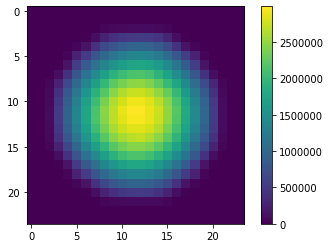

In [3]:
plt.imshow(newheat)
plt.colorbar()

In [4]:
np.sum(newheat) #plena is not included!

397595517.20000005

In [5]:
powerpeaking=newheat/np.mean(newheat[np.nonzero(newheat)])

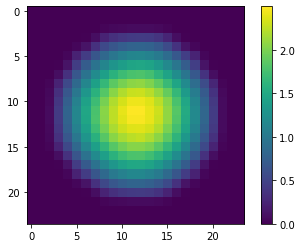

In [6]:
plt.figure()
plt.imshow(powerpeaking)
plt.colorbar()
plt.show()

In [7]:
np.max(powerpeaking)

2.4973845957637466

# READ KOMODO



In [2]:
def getKomodoMap(filename,before,skip,N=10,printing=False):
    """
    Parameters
    ----------
    filename : str
        name of file
    before : str
        string of unique (ie. only appears once in output) location to find the right place to extract
    skip : int
        how many lines to skip after "before" string till extracting
    N : int
        size of the lattice
    """
    lines=open(filename,'r').readlines()
    heatmap=np.zeros((N,N))
    for i,line in enumerate(lines):
        x=line.strip()
        if before == x:
            for j in range(skip+1,N+skip+1):
                x=lines[i+j].strip().split()
                if printing:
                    print(x)
                for k in range(len(x)-1):
                    heatmap[j-skip-1,k]=float(x[k+1])
    return heatmap 
    

In [9]:
path='/home/zsolt/Documents/ReactorPhysics/KOMODO/smpl/static/'
filename='TAPthermalTest.out'
before='Radial Power Distribution'

komodomap=getKomodoMap(path+filename,before,skip=2,printing=True)
komodomap

['10', '2.468', '2.397', '2.257', '2.054', '1.798', '1.499', '1.169', '0.821', '0.444', '0.051']
['9', '2.397', '2.326', '2.188', '1.989', '1.737', '1.443', '1.120', '0.781', '0.419', '0.048']
['8', '2.257', '2.188', '2.054', '1.861', '1.616', '1.332', '1.021', '0.698', '0.364', '0.041']
['7', '2.054', '1.989', '1.861', '1.676', '1.443', '1.171', '0.875', '0.567', '0.254', '0.024']
['6', '1.798', '1.737', '1.616', '1.443', '1.223', '0.968', '0.684', '0.365', '0.060']
['5', '1.499', '1.443', '1.332', '1.171', '0.968', '0.733', '0.454', '0.088', '0.013']
['4', '1.169', '1.120', '1.021', '0.875', '0.684', '0.454', '0.244', '0.028']
['3', '0.821', '0.781', '0.698', '0.567', '0.365', '0.088', '0.028']
['2', '0.444', '0.419', '0.364', '0.254', '0.060', '0.013']
['1', '0.051', '0.048', '0.041', '0.024']


array([[2.468, 2.397, 2.257, 2.054, 1.798, 1.499, 1.169, 0.821, 0.444,
        0.051],
       [2.397, 2.326, 2.188, 1.989, 1.737, 1.443, 1.12 , 0.781, 0.419,
        0.048],
       [2.257, 2.188, 2.054, 1.861, 1.616, 1.332, 1.021, 0.698, 0.364,
        0.041],
       [2.054, 1.989, 1.861, 1.676, 1.443, 1.171, 0.875, 0.567, 0.254,
        0.024],
       [1.798, 1.737, 1.616, 1.443, 1.223, 0.968, 0.684, 0.365, 0.06 ,
        0.   ],
       [1.499, 1.443, 1.332, 1.171, 0.968, 0.733, 0.454, 0.088, 0.013,
        0.   ],
       [1.169, 1.12 , 1.021, 0.875, 0.684, 0.454, 0.244, 0.028, 0.   ,
        0.   ],
       [0.821, 0.781, 0.698, 0.567, 0.365, 0.088, 0.028, 0.   , 0.   ,
        0.   ],
       [0.444, 0.419, 0.364, 0.254, 0.06 , 0.013, 0.   , 0.   , 0.   ,
        0.   ],
       [0.051, 0.048, 0.041, 0.024, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]])

Now read the radial distributions at various axial heights, just to see that the radial map in the main output is infact the sum of all the radial maps.

In [5]:
# path='/home/zsolt/Documents/ReactorPhysics/KOMODO/smpl/static/'
path='./'
filename='TAPthermalTest_3d_power.out'

komodomap=np.zeros((10,10))
komodomaps=[]
for i in range(1,23):
    # before='z =  %d'%i
    before=f'z =  {i: >2}'
    print(before)
    komodomapI=getKomodoMap(path+filename,before,skip=1)
    komodomaps.append(komodomapI)
    komodomap=komodomap+komodomapI
komodomap

z =   1
z =   2
z =   3
z =   4
z =   5
z =   6
z =   7
z =   8
z =   9
z =  10
z =  11
z =  12
z =  13
z =  14
z =  15
z =  16
z =  17
z =  18
z =  19
z =  20
z =  21
z =  22


array([[3.83 , 3.714, 3.502, 3.19 , 2.79 , 2.322, 1.814, 1.276, 0.694,
        0.08 ],
       [3.714, 3.61 , 3.394, 3.082, 2.694, 2.238, 1.738, 1.21 , 0.648,
        0.074],
       [3.502, 3.394, 3.19 , 2.886, 2.51 , 2.068, 1.584, 1.082, 0.564,
        0.064],
       [3.19 , 3.082, 2.886, 2.6  , 2.238, 1.818, 1.36 , 0.88 , 0.396,
        0.038],
       [2.79 , 2.694, 2.51 , 2.238, 1.898, 1.506, 1.062, 0.566, 0.09 ,
        0.   ],
       [2.322, 2.238, 2.068, 1.818, 1.506, 1.138, 0.708, 0.138, 0.018,
        0.   ],
       [1.814, 1.738, 1.584, 1.36 , 1.062, 0.708, 0.378, 0.042, 0.   ,
        0.   ],
       [1.276, 1.21 , 1.082, 0.88 , 0.566, 0.138, 0.042, 0.   , 0.   ,
        0.   ],
       [0.694, 0.648, 0.564, 0.396, 0.09 , 0.018, 0.   , 0.   , 0.   ,
        0.   ],
       [0.08 , 0.074, 0.064, 0.038, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]])

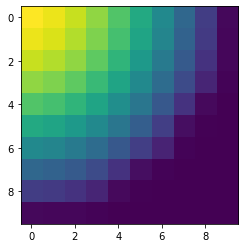

In [11]:
plt.imshow(komodomap)

# Compare K-EFF

77 pcm is worse than it first looked. Now the geometries should be perfectly comparable. Might be that discontinouty factors should be applied between fuel and moderated fuel assemblies.

In [12]:
kserp=1.36531
kkomo=1.363861

def reactivity(k):
    return 1e5*(k-1)/k

reactivity(kserp)-reactivity(kkomo)

77.81565968103314

# Compare power peaking

Note, in serpent, for better accuracy one could take the mean of the four quadrants, now Im just looking at the lower right. And it is already pretty fascinating.

For a later better benchmark, do the axial divisions in the tally, so for every axial height I can also check whether the power is comparable.

In [13]:
#i have a 24x24 lattice, but only 20x20 is effectively needed, the larger lattice was used only 
#to fit it in a cylinder... thinking of it, i could have filled the lattice in a box:)
#nevermind, 12:-2,12:-2 should be the lower left corner
#for the mean i take the nonzero values not to bias the average power per node.
newheat[12:-2,12:-2]/np.mean(newheat[np.nonzero(newheat)])

array([[2.47775329, 2.41283887, 2.28594096, 2.0839915 , 1.8221461 ,
        1.50754416, 1.17319401, 0.82281567, 0.445538  , 0.07444441],
       [2.38400565, 2.33433034, 2.2081088 , 1.99943743, 1.75334884,
        1.44956876, 1.11931856, 0.77819807, 0.41024006, 0.06868503],
       [2.26578359, 2.18994713, 2.06391764, 1.86956685, 1.62741121,
        1.32450789, 1.00600641, 0.67910881, 0.35386038, 0.05670734],
       [2.04703354, 1.99180535, 1.85655725, 1.66325024, 1.43647565,
        1.15577551, 0.86001996, 0.55314863, 0.2515229 , 0.03674203],
       [1.79719572, 1.73076992, 1.61176294, 1.44257129, 1.21400976,
        0.95899482, 0.68396529, 0.35545777, 0.08955751, 0.        ],
       [1.49975343, 1.4451014 , 1.33598106, 1.16715682, 0.95733313,
        0.7220238 , 0.44674711, 0.12959168, 0.01731697, 0.        ],
       [1.15722844, 1.11183678, 1.01570099, 0.8659987 , 0.66799971,
        0.44269643, 0.24188928, 0.04225983, 0.        , 0.        ],
       [0.80514081, 0.76470499, 0.6913919

In [14]:
komodomap

array([[2.461, 2.387, 2.25 , 2.05 , 1.793, 1.492, 1.166, 0.82 , 0.446,
        0.052],
       [2.387, 2.32 , 2.18 , 1.981, 1.731, 1.438, 1.117, 0.777, 0.417,
        0.047],
       [2.25 , 2.18 , 2.05 , 1.855, 1.613, 1.329, 1.018, 0.695, 0.363,
        0.041],
       [2.05 , 1.981, 1.855, 1.67 , 1.438, 1.168, 0.874, 0.565, 0.254,
        0.025],
       [1.793, 1.731, 1.613, 1.438, 1.22 , 0.967, 0.682, 0.364, 0.058,
        0.   ],
       [1.492, 1.438, 1.329, 1.168, 0.967, 0.731, 0.455, 0.089, 0.011,
        0.   ],
       [1.166, 1.117, 1.018, 0.874, 0.682, 0.455, 0.243, 0.027, 0.   ,
        0.   ],
       [0.82 , 0.777, 0.695, 0.565, 0.364, 0.089, 0.027, 0.   , 0.   ,
        0.   ],
       [0.446, 0.417, 0.363, 0.254, 0.058, 0.011, 0.   , 0.   , 0.   ,
        0.   ],
       [0.052, 0.047, 0.041, 0.025, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]])

In [15]:
(newheat[12:-2,12:-2]/np.mean(newheat[np.nonzero(newheat)])-komodomap)

array([[ 0.01675329,  0.02583887,  0.03594096,  0.0339915 ,  0.0291461 ,
         0.01554416,  0.00719401,  0.00281567, -0.000462  ,  0.02244441],
       [-0.00299435,  0.01433034,  0.0281088 ,  0.01843743,  0.02234884,
         0.01156876,  0.00231856,  0.00119807, -0.00675994,  0.02168503],
       [ 0.01578359,  0.00994713,  0.01391764,  0.01456685,  0.01441121,
        -0.00449211, -0.01199359, -0.01589119, -0.00913962,  0.01570734],
       [-0.00296646,  0.01080535,  0.00155725, -0.00674976, -0.00152435,
        -0.01222449, -0.01398004, -0.01185137, -0.0024771 ,  0.01174203],
       [ 0.00419572, -0.00023008, -0.00123706,  0.00457129, -0.00599024,
        -0.00800518,  0.00196529, -0.00854223,  0.03155751,  0.        ],
       [ 0.00775343,  0.0071014 ,  0.00698106, -0.00084318, -0.00966687,
        -0.0089762 , -0.00825289,  0.04059168,  0.00631697,  0.        ],
       [-0.00877156, -0.00516322, -0.00229901, -0.0080013 , -0.01400029,
        -0.01230357, -0.00111072,  0.01525983